# DS 542 - 2025 Fall - Homework 5

In this homework, you will practice using PyTorch's frameworks for repeatable data management and reusable model designs.
You will also track gradient statistics during the fitting process.

When you are done writing code, make sure to run all the cells and then submit your notebook in [Gradescope](https://www.gradescope.com/courses/1071076).


## Problem 1 - Setup Dataset and DataLoader Objects

PyTorch provides various utilities to help managing large data sets.
In this problem, you will implement `Dataset` and `DataLoader` objects for the Pima Indians Diabetes data set.
This data set is small and easily fits in memory, but these objects will also help with randomization and batching for stochastic gradient descent.


Here is a link to PyTorch's [Datasets & DataLoaders tutorial](https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

In [2]:
df = pd.read_csv("https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/raw/refs/heads/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
len(df)

768

Finish the implementation of the `DiabetesDataset` class below by implementing the missing methods for `torch.utils.data.Dataset`.
The dataset should return pairs of tensors where the first tensor is the input row and the second tensor has the corresponding `Outcome` target.

In [5]:
class DiabetesDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):
        self.X = torch.tensor(dataframe.drop('Outcome', axis=1).values, dtype=torch.float32)
        self.y = torch.tensor(dataframe['Outcome'].values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

Create a DataLoader object using an instance of your `DiabetesDataSet` class and configure it to randomize the data and return batches of 100 rows at a time.

In [8]:
data = DiabetesDataset(df)

dataloader = torch.utils.data.DataLoader(
    data,
    batch_size=100,
    shuffle=True
)


...

Ellipsis

Test your data loader.

In [9]:
# DO NOT CHANGE

for batch_input, batch_output in dataloader:
    print("INPUT", batch_input)
    print("OUTPUT", batch_output)
    break

INPUT tensor([[7.0000e+00, 1.3300e+02, 8.4000e+01, 0.0000e+00, 0.0000e+00, 4.0200e+01,
         6.9600e-01, 3.7000e+01],
        [2.0000e+00, 9.2000e+01, 5.2000e+01, 0.0000e+00, 0.0000e+00, 3.0100e+01,
         1.4100e-01, 2.2000e+01],
        [7.0000e+00, 1.7900e+02, 9.5000e+01, 3.1000e+01, 0.0000e+00, 3.4200e+01,
         1.6400e-01, 6.0000e+01],
        [7.0000e+00, 1.2900e+02, 6.8000e+01, 4.9000e+01, 1.2500e+02, 3.8500e+01,
         4.3900e-01, 4.3000e+01],
        [9.0000e+00, 1.5600e+02, 8.6000e+01, 2.8000e+01, 1.5500e+02, 3.4300e+01,
         1.1890e+00, 4.2000e+01],
        [1.0000e+00, 1.0500e+02, 5.8000e+01, 0.0000e+00, 0.0000e+00, 2.4300e+01,
         1.8700e-01, 2.1000e+01],
        [9.0000e+00, 1.1900e+02, 8.0000e+01, 3.5000e+01, 0.0000e+00, 2.9000e+01,
         2.6300e-01, 2.9000e+01],
        [2.0000e+00, 1.2700e+02, 5.8000e+01, 2.4000e+01, 2.7500e+02, 2.7700e+01,
         1.6000e+00, 2.5000e+01],
        [6.0000e+00, 1.0300e+02, 7.2000e+01, 3.2000e+01, 1.9000e+02, 3.770

## Problem 2 - Use Adam to Optimize Logistic Regression

Write a training loop using PyTorch's [`torch.optim.Adam`](https://docs.pytorch.org/docs/stable/generated/torch.optim.Adam.html) to optimize logistic regression.
Use the following `LogisticRegression` class for the implementation of logistic regression and [`torch.nn.functional.binary_cross_entropy`](https://docs.pytorch.org/docs/stable/generated/torch.nn.functional.binary_cross_entropy.html) for the loss function.

Run the training loop for 10 epochs printing the average training batch loss for each epoch.

In [10]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # use torch.nn.Parameter to register these as model parameters
        self.weights = torch.nn.Parameter(torch.zeros(len(df.columns)-1, 1))
        self.bias = torch.nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return torch.sigmoid(x @ self.weights + self.bias)

In [15]:
# Initialize model
model = LogisticRegression()

# Initialize Adam optimizer with learning rate 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop for 10 epochs
num_epochs = 10

for epoch in range(num_epochs):
    epoch_loss = 0.0
    num_batches = 0

    for batch_input, batch_output in dataloader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        predictions = model(batch_input).squeeze()

        # Compute loss
        loss = torch.nn.functional.binary_cross_entropy(predictions, batch_output)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item()
        num_batches += 1

    # Print average loss for this epoch
    avg_loss = epoch_loss / num_batches
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

Epoch 1/10, Average Loss: 0.7638
Epoch 2/10, Average Loss: 0.7116
Epoch 3/10, Average Loss: 0.6543
Epoch 4/10, Average Loss: 0.6320
Epoch 5/10, Average Loss: 0.6322
Epoch 6/10, Average Loss: 0.6500
Epoch 7/10, Average Loss: 0.6413
Epoch 8/10, Average Loss: 0.6157
Epoch 9/10, Average Loss: 0.6394
Epoch 10/10, Average Loss: 0.6248


## Problem 3 - Track Training Statistics and Gradients

Copy your training loop from problem 2 and modify it as follows.

1. Increase the number of epochs to 100.
2. Track the training loss of each batch.
3. Track the training accuracy of each batch.
4. Track the loss gradient of each batch for both the weights and bias of the logistic regression.
5. After the training loop is done, plot the data from 2-4. Use Matplotlib's subplot function to stack the charts vertically so they are aligned.

In [17]:
# Initialize NEW model for Problem 3
model = LogisticRegression()

# Initialize Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Lists to track statistics
train_losses = []
train_accuracies = []
weight_gradients = []
bias_gradients = []

# Training loop for 100 epochs (CHANGED from 10)
num_epochs = 100

for epoch in range(num_epochs):
    epoch_loss = 0.0
    num_batches = 0

    for batch_input, batch_output in dataloader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        predictions = model(batch_input).squeeze()

        # Compute loss
        loss = torch.nn.functional.binary_cross_entropy(predictions, batch_output)

        # Backward pass
        loss.backward()

        # NEW: Track loss
        train_losses.append(loss.item())

        # NEW: Track accuracy
        predicted_classes = (predictions >= 0.5).float()
        accuracy = (predicted_classes == batch_output).float().mean().item()
        train_accuracies.append(accuracy)

        # NEW: Track gradients (before optimizer.step())
        weight_gradients.append(model.weights.grad.squeeze().detach().cpu().numpy().copy())
        bias_gradients.append(model.bias.grad.item())

        # Update weights
        optimizer.step()

        # Accumulate loss for epoch average
        epoch_loss += loss.item()
        num_batches += 1

    # Print average loss for this epoch
    avg_loss = epoch_loss / num_batches
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

Epoch 1/100, Average Loss: 0.9332
Epoch 2/100, Average Loss: 0.7875
Epoch 3/100, Average Loss: 0.6930
Epoch 4/100, Average Loss: 0.6304
Epoch 5/100, Average Loss: 0.6158
Epoch 6/100, Average Loss: 0.6167
Epoch 7/100, Average Loss: 0.6349
Epoch 8/100, Average Loss: 0.6319
Epoch 9/100, Average Loss: 0.6404
Epoch 10/100, Average Loss: 0.6318
Epoch 11/100, Average Loss: 0.6188
Epoch 12/100, Average Loss: 0.6126
Epoch 13/100, Average Loss: 0.6074
Epoch 14/100, Average Loss: 0.6312
Epoch 15/100, Average Loss: 0.6280
Epoch 16/100, Average Loss: 0.6146
Epoch 17/100, Average Loss: 0.6052
Epoch 18/100, Average Loss: 0.6047
Epoch 19/100, Average Loss: 0.6210
Epoch 20/100, Average Loss: 0.6322
Epoch 21/100, Average Loss: 0.6490
Epoch 22/100, Average Loss: 0.6630
Epoch 23/100, Average Loss: 0.6569
Epoch 24/100, Average Loss: 0.6385
Epoch 25/100, Average Loss: 0.6183
Epoch 26/100, Average Loss: 0.6563
Epoch 27/100, Average Loss: 0.6067
Epoch 28/100, Average Loss: 0.6070
Epoch 29/100, Average Loss: 0

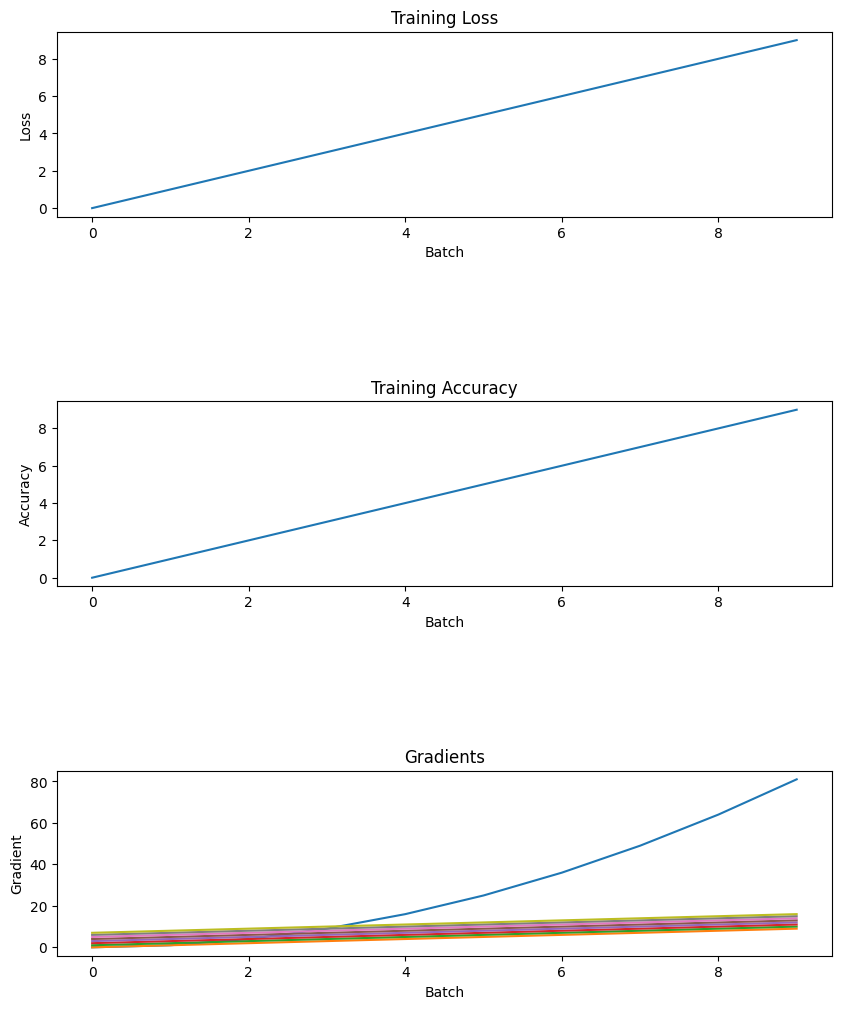

In [18]:
weight_gradients_array = np.array(weight_gradients)  # Shape: (num_batches, 8)

plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)

# plot training loss
plt.plot(range(10))
plt.title("Training Loss")
plt.xlabel("Batch")
plt.ylabel("Loss")

plt.subplot(3, 1, 2)

# plot training accuracy
plt.plot(range(10))
plt.title("Training Accuracy")
plt.xlabel("Batch")
plt.ylabel("Accuracy")

plt.subplot(3, 1, 3)

# plot weights gradient
plt.plot([x ** 2 for x in range(10)], label="bias")
for i in range(8):
    plt.plot(range(i, i+10), label=f"{df.columns[i]}")
plt.title("Gradients")
plt.xlabel("Batch")
plt.ylabel("Gradient")

plt.subplots_adjust(hspace=1.0)
plt.show();